<a href="https://colab.research.google.com/github/SanjanaaaG/Hotel-Cancelation/blob/main/Hotel_Cancellation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Goal of this project is to Predict the Guests who are likely to Cancel the Hotel Booking using Python. Therefore, predicting reservations which might get canceled and preventing these cancellations will create a surplus revenue, better forecasts and reduce uncertainty in business management decisions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

In [3]:
df = pd.read_csv("/hotel_bookings.csv")
df.sample(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
17937,INN17938,2.0,0.0,0.0,4.0,Meal Plan 1,0.0,Room_Type 4,3.0,2018.0,2.0,16.0,Online,0.0,0.0,0.0,106.00,0.0,Canceled
31805,INN31806,2.0,0.0,2.0,0.0,Meal Plan 2,0.0,Room_Type 1,275.0,2018.0,4.0,17.0,Offline,0.0,0.0,0.0,110.00,0.0,Canceled
4341,INN04342,2.0,0.0,0.0,3.0,Meal Plan 1,0.0,Room_Type 1,16.0,2018.0,12.0,6.0,Online,0.0,0.0,0.0,104.00,0.0,Not_Canceled
18139,INN18140,2.0,0.0,2.0,1.0,Not Selected,0.0,Room_Type 1,81.0,2018.0,7.0,3.0,Online,0.0,0.0,0.0,103.50,1.0,Canceled
1880,INN01881,2.0,0.0,2.0,2.0,Meal Plan 1,0.0,Room_Type 1,64.0,2018.0,9.0,4.0,Online,0.0,0.0,0.0,103.95,1.0,Not_Canceled
32693,INN32694,1.0,0.0,1.0,4.0,Meal Plan 1,0.0,Room_Type 4,143.0,2018.0,9.0,21.0,Online,0.0,0.0,0.0,143.10,1.0,Canceled
1816,INN01817,2.0,0.0,2.0,1.0,Meal Plan 2,0.0,Room_Type 1,117.0,2017.0,8.0,1.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled
1389,INN01390,2.0,0.0,0.0,3.0,Meal Plan 1,0.0,Room_Type 1,27.0,2018.0,5.0,10.0,Online,0.0,0.0,0.0,141.00,0.0,Canceled
29909,INN29910,1.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 1,28.0,2018.0,12.0,1.0,Corporate,0.0,0.0,0.0,75.00,1.0,Not_Canceled
8512,INN08513,2.0,NaN,2.0,1.0,Meal Plan 2,NaN,Room_Type 1,145.0,2017.0,8.0,29.0,Offline,0.0,0.0,0.0,94.50,0.0,Not_Canceled


In [4]:
df.shape

(36275, 19)

Data Cleaning:


In [5]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape[0])

Number of duplicate rows:  0


In [6]:
df.isnull().sum()

Booking_ID                                 0
no_of_adults                             413
no_of_children                           324
no_of_weekend_nights                     367
no_of_week_nights                        807
type_of_meal_plan                        526
required_car_parking_space              2592
room_type_reserved                      1171
lead_time                                472
arrival_year                             378
arrival_month                            504
arrival_date                             981
market_segment_type                     1512
repeated_guest                           586
no_of_previous_cancellations             497
no_of_previous_bookings_not_canceled     550
avg_price_per_room                       460
no_of_special_requests                   789
booking_status                             0
dtype: int64

In [7]:
df["type_of_meal_plan"].replace("null", np.nan, inplace=True)

In [8]:
room_type_mode = df["room_type_reserved"].mode().iloc[0]
df["room_type_reserved"].fillna(room_type_mode, inplace=True)

In [9]:
df["required_car_parking_space"].fillna(0, inplace=True)

In [10]:
arrival_date_median = df["arrival_date"].median()
df["arrival_date"].fillna(arrival_date_median, inplace=True)

In [11]:
df["no_of_weekend_nights"].fillna(0, inplace=True)

In [16]:
df["no_of_week_nights"].fillna(0, inplace=True)

In [12]:
no_of_adults_median = df["no_of_adults"].median()
df["no_of_adults"].fillna(no_of_adults_median, inplace=True)


arrival_year_mode = df["arrival_year"].mode().iloc[0]
df["arrival_year"].fillna(arrival_year_mode, inplace=True)


arrival_month_mode = df["arrival_month"].mode().iloc[0]
df["arrival_month"].fillna(arrival_month_mode, inplace=True)


df["market_segment_type"].fillna("Unknown", inplace=True)


df["repeated_guest"].fillna(0, inplace=True)
df["no_of_previous_cancellations"].fillna(0, inplace=True)
df["no_of_previous_bookings_not_canceled"].fillna(0, inplace=True)
df["no_of_special_requests"].fillna(0, inplace=True)


df["no_of_children"].fillna(0, inplace=True)

In [13]:
avg_price_per_room_median = df["avg_price_per_room"].median()
df["avg_price_per_room"].fillna(avg_price_per_room_median, inplace=True)

lead_time_median = df["lead_time"].median()
df["lead_time"].fillna(lead_time_median, inplace=True)

df["type_of_meal_plan"].fillna("Unknown", inplace=True)

In [14]:
df["booking_status"].replace({"Not_Canceled": 0, "Canceled": 1}, inplace=True)

In [17]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Exploratory Data Analysis:

Total Booking per market segment:

In [18]:
segments=df["market_segment_type"].value_counts()

fig = px.pie(segments,
             values=segments.values,
             names=segments.index,
             title="Bookings per market segment")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

Total Booking per type of meal:


In [19]:
segments=df["type_of_meal_plan"].value_counts()

fig = px.pie(segments,
             values=segments.values,
             names=segments.index,
             title="Bookings per meal type")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

Based on the market_segment_type column, we can see that the majority of the bookings were made online, with 22,264 observations or 61.43% of the total bookings. Offline bookings accounted for 10,076 observations or 27.83% of the total, while corporate bookings made up only 5.31% of the total with 1,926 observations. There were also a significant number of bookings with unknown market segment type, at 4.17% of the total with 1,512 observations. The remaining bookings were made through complementary (1.04%) and aviation (0.33%) channels.

This information could potentially be used to inform marketing and sales strategies for the hotel. For example, since the majority of bookings were made online, the hotel may want to focus more of their advertising and promotional efforts on online channels, such as social media and online travel agencies.

Correlation of each feature and cancelation status:

In [20]:
corr = df.corr()["booking_status"]
corr.abs().sort_values(ascending=False)[1:]

<ipython-input-20-4fb01e5a3e87>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



lead_time                               0.435263
no_of_special_requests                  0.248741
arrival_year                            0.178227
avg_price_per_room                      0.141757
repeated_guest                          0.106365
no_of_week_nights                       0.088144
no_of_adults                            0.086745
required_car_parking_space              0.082159
no_of_weekend_nights                    0.062168
no_of_previous_bookings_not_canceled    0.059756
no_of_previous_cancellations            0.033679
no_of_children                          0.033660
arrival_month                           0.012948
arrival_date                            0.009251
Name: booking_status, dtype: float64

Based on the correlation analysis between each feature and the booking status, we can see that lead_time has the strongest positive correlation with booking_status at 0.435263. This suggests that longer lead times (i.e., the number of days between the booking date and the arrival date) are associated with a higher likelihood of cancellation.

Additionally, no_of_special_requests has a moderate positive correlation with booking_status at 0.248741, indicating that bookings with more special requests may be more likely to be cancelled. avg_price_per_room also has a weak positive correlation with booking_status at 0.141757, suggesting that higher prices may be associated with a slightly higher likelihood of cancellation.

 Cancellations by room type

In [21]:
pd.crosstab(df["booking_status"].replace({0: "Not_Cancelled", 1: "Cancelled"}), df["room_type_reserved"])


room_type_reserved,Room_Type 1,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7
booking_status,,,,,,,
Cancelled,9166,218,2,1998,70,396,35
Not_Cancelled,19239,446,4,3853,186,543,119


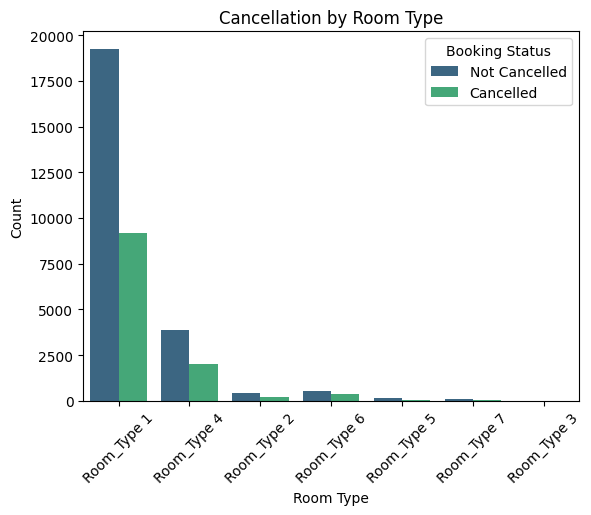

In [22]:
sns.countplot(x="room_type_reserved", hue="booking_status", data=df, palette='viridis')
plt.title("Cancellation by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.legend(title="Booking Status", labels=['Not Cancelled', 'Cancelled'])
plt.xticks(rotation=45)
plt.show()

Based on the contingency table of "booking_status" and "room_type_reserved", we can see that the majority of bookings were for "Room_Type 1", with 28,405 bookings in total. "Room_Type 4" had the second highest number of bookings with 5,851, followed by "Room_Type 2" with 5,364 bookings.

However, when we look at the cancellation rates for each room type, we see a different pattern. "Room_Type 3" had the highest cancellation rate at 50%, although this was based on a very small sample size of only 4 bookings. "Room_Type 2" had the second highest cancellation rate at 3.90%, followed by "Room_Type 1" with a cancellation rate of 3.10%.

Cancellation by lead time:

In [23]:
ct=pd.crosstab(index=df.booking_status, columns=pd.cut(df.lead_time, bins=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 365, np.inf]))

ct.columns = ['1-30\n days', '31-60\n days', '61-90\n days', '91-120\n days', '121-150\n days',
          '151-180\n days', '181-210\n days', '211-240\n days', '241-270\n days',
          '271-300\n days', '300+\n days']
ct.index=["Not Cancelled", "Cancelled"]

ct

,1-30\n days,31-60\n days,61-90\n days,91-120\n days,121-150\n days,151-180\n days,181-210\n days,211-240\n days,241-270\n days,271-300\n days,300+\n days
Not Cancelled,9313,5061,3214,2071,1475,683,464,273,245,369,12
Cancelled,1669,1621,1236,1381,765,1291,1041,615,685,1285,229


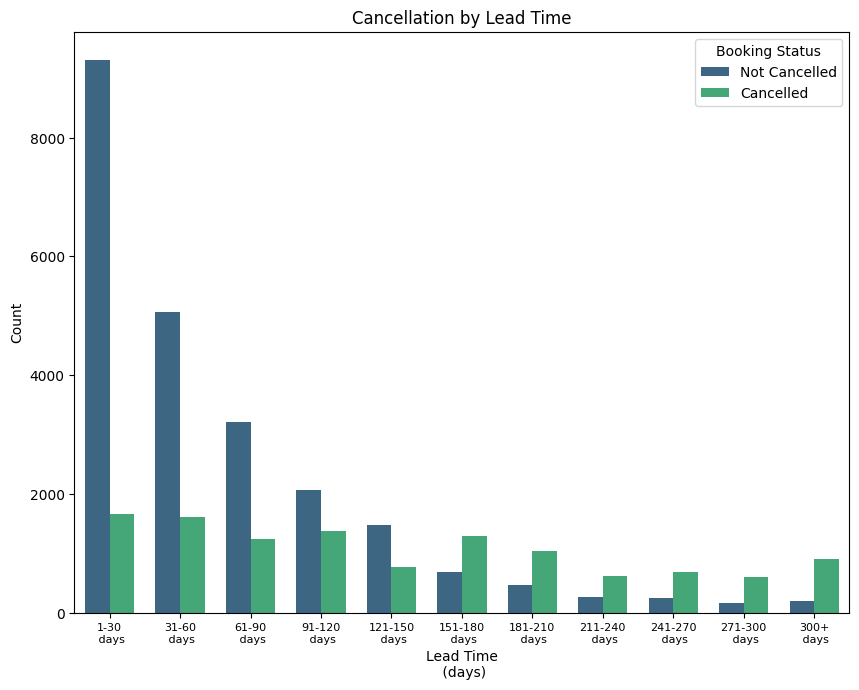

In [24]:
plt.figure(figsize=(10, 7))

labels = ['1-30\n days', '31-60\n days', '61-90\n days', '91-120\n days', '121-150\n days',
          '151-180\n days', '181-210\n days', '211-240\n days', '241-270\n days',
          '271-300\n days', '300+\n days']

sns.countplot(x=pd.cut(df["lead_time"], bins=[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, np.inf], labels=labels ),hue="booking_status", data=df, width=0.7, palette='viridis')

plt.title("Cancellation by Lead Time")
plt.xlabel("Lead Time\n (days)")
plt.ylabel("Count")
plt.xticks(fontsize=8)
plt.legend(title="Booking Status", labels=['Not Cancelled', 'Cancelled'])
plt.subplots_adjust(bottom=0.05)
plt.show()

Based on the crosstab of booking_status -lead_time in days and visualizations, it appears that bookings made further in advance tend to have a higher rate of cancellation. Specifically, bookings made in the (0.0, 30.0] and (30.0, 60.0] day ranges have a lower cancellation rate, while bookings made in the (60.0, 90.0] to (365.0, inf] day ranges have a higher cancellation rate.

Hotel cancellations by market segment type:


In [25]:
ct1 = pd.crosstab(df['booking_status'], df['market_segment_type'])

ct1.columns = ['Aviation', 'Complementary', 'Corporate', 'Offline', 'Online', 'Unknown']
ct1.index=["Not Cancelled", "Cancelled"]

ct1

,Aviation,Complementary,Corporate,Offline,Online,Unknown
Not Cancelled,86,375,1722,7053,14119,1035
Cancelled,36,0,204,3023,8145,477


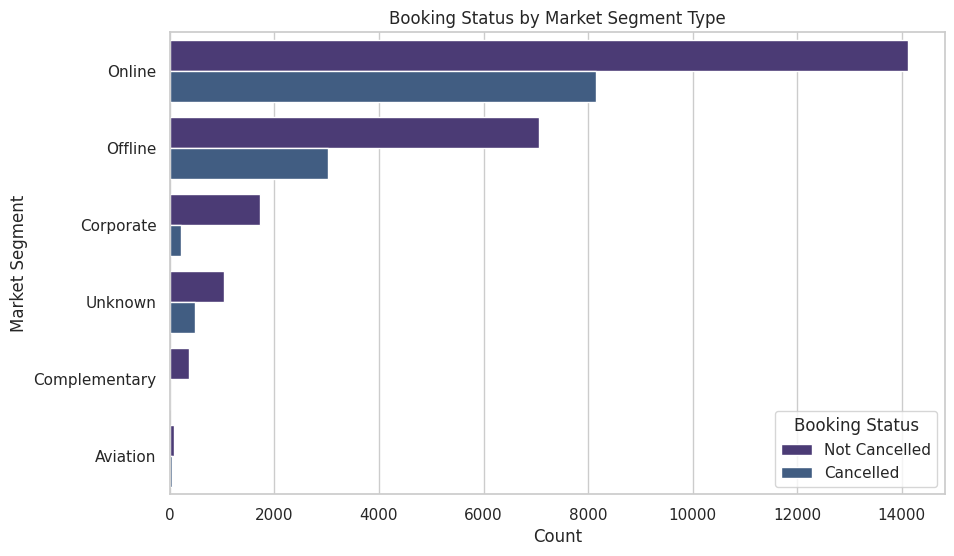

In [26]:
sns.set(style="whitegrid", palette="viridis", color_codes=True)
plt.figure(figsize=(10,6))
ax = sns.countplot(y="market_segment_type", hue="booking_status", data=df, order=df["market_segment_type"].value_counts().index)
ax.set(xlabel='Count', ylabel='Market Segment')
plt.legend(title="Booking Status", labels=['Not Cancelled', 'Cancelled'], loc='lower right')
plt.title('Booking Status by Market Segment Type')
plt.show()

majority of bookings were made online, with a total count of 14119, while the highest number of cancellations occurred for bookings made online, with a count of 8145. Corporate bookings had the second highest count for not cancelled bookings, with a count of 1722, while offline bookings had the second highest count for cancellations, with a count of 3023. It is also interesting to note that there were no complementary bookings that were cancelled.

Based on the data, the highest number of cancellations occurred in the "Online" market segment, followed by "Offline" and "Corporate" segments. On the other hand, the lowest number of cancellations occurred in the "Aviation" and "Complementary" segments.


Distribution of Booking Status by Average Price per Room

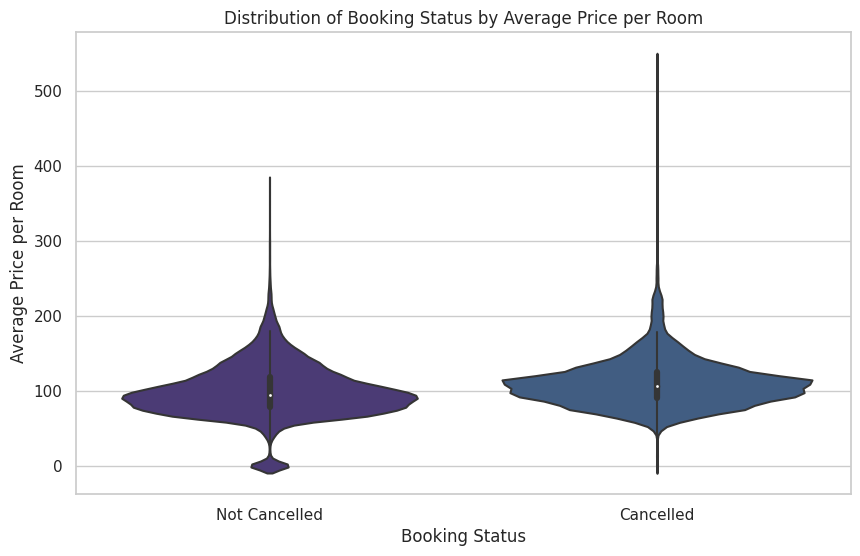

In [27]:
sns.set(style="whitegrid", palette='viridis')

plt.figure(figsize=(10,6))
sns.violinplot(x="booking_status", y="avg_price_per_room", data=df)
plt.xlabel('Booking Status')
plt.ylabel('Average Price per Room')
plt.xticks([0, 1], ['Not Cancelled', 'Cancelled'])
plt.title('Distribution of Booking Status by Average Price per Room')
plt.show()

In [28]:
ct2=pd.crosstab(pd.cut(df["avg_price_per_room"], bins=[0, 50, 100, 150, 200, np.inf]), df["booking_status"])
ct2.columns = ['Not Cancelled', 'Cancelled']
ct2

,Not Cancelled,Cancelled
avg_price_per_room,,
"(0.0, 50.0]",324,37
"(50.0, 100.0]",13297,4901
"(100.0, 150.0]",8200,5800
"(150.0, 200.0]",1789,902
"(200.0, inf]",247,239


 Which Month is the Most Occupied (Busiest) with Bookings at the Hotel

In [29]:
df['arrival_month'].value_counts(normalize = False)

10.0    5742
9.0     4550
8.0     3761
6.0     3162
12.0    2977
11.0    2937
7.0     2887
4.0     2700
5.0     2563
3.0     2328
2.0     1668
1.0     1000
Name: arrival_month, dtype: int64

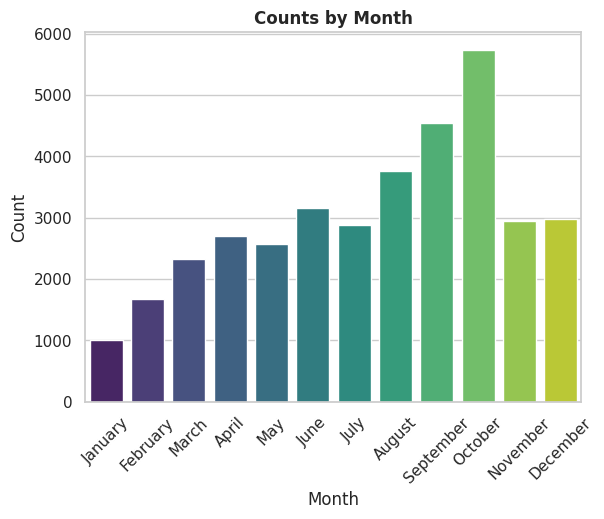

In [30]:
import calendar

df1 = pd.DataFrame({'arrival_month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'count': [1000, 1668, 2328, 2700, 2563, 3162, 2887, 3761, 4550, 5742, 2937, 2977]})

df1['arrival_month'] = df1['arrival_month'].apply(lambda x: calendar.month_name[x])

ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df1['arrival_month'] = pd.Categorical(df1['arrival_month'], categories=ordered_months, ordered=True)

sns.barplot(x='arrival_month', y='count', data=df1, palette='viridis')
plt.title('Counts by Month', weight='bold')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

we can conclude that the month of October (10.0) had the highest number of arrivals to the hotels, followed by September (9.0) and August (8.0). The months with the lowest number of arrivals were February (2.0) and January (1.0)

 Booking Status by Month

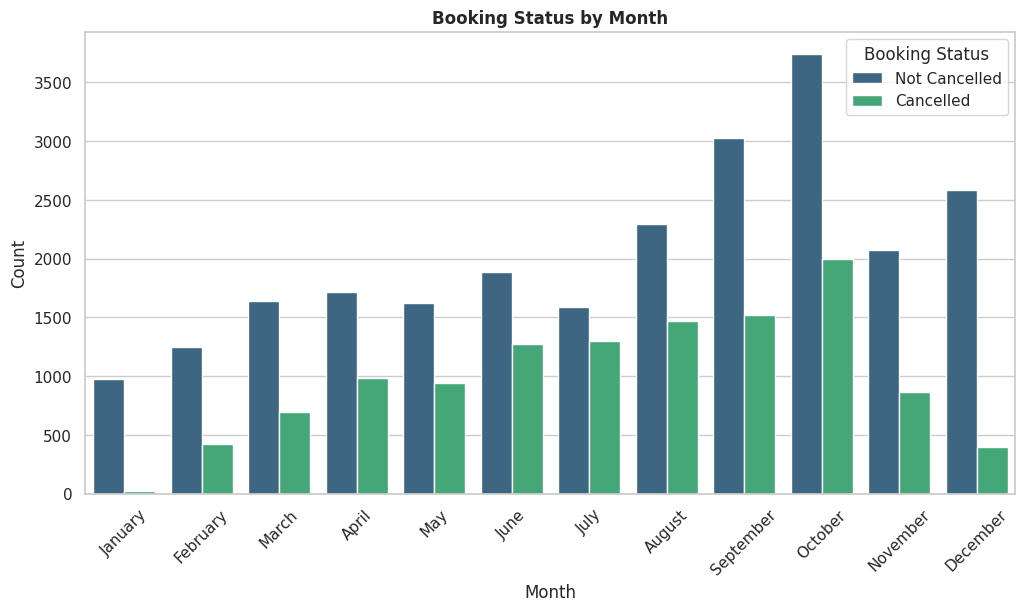

In [31]:
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
#df['arrival_month'] = pd.Categorical(df['arrival_month'], categories=ordered_months, ordered=True)

plt.figure(figsize=(12,6))
sns.countplot(x='arrival_month', hue='booking_status', data = df, palette= 'viridis')
plt.title('Booking Status by Month', weight='bold')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(title="Booking Status", labels=['Not Cancelled', 'Cancelled'])

plt.xticks(range(0,12), ordered_months, rotation=45)
plt.show()

 the month with the highest number of cancellations is in October with a total of 1996 cancellations.

Booking Status by Average Price Per Room

In [32]:
ct1=pd.crosstab(index=df.booking_status, columns=pd.cut(df.avg_price_per_room, bins=[0, 50, 100, 150, 200, np.inf]))

ct1.columns = ['0-50', '51-100', '101-150', '151-200', '201+']
ct1.index=["Not Cancelled", "Cancelled"]

ct1

,0-50,51-100,101-150,151-200,201+
Not Cancelled,324,13297,8200,1789,247
Cancelled,37,4901,5800,902,239


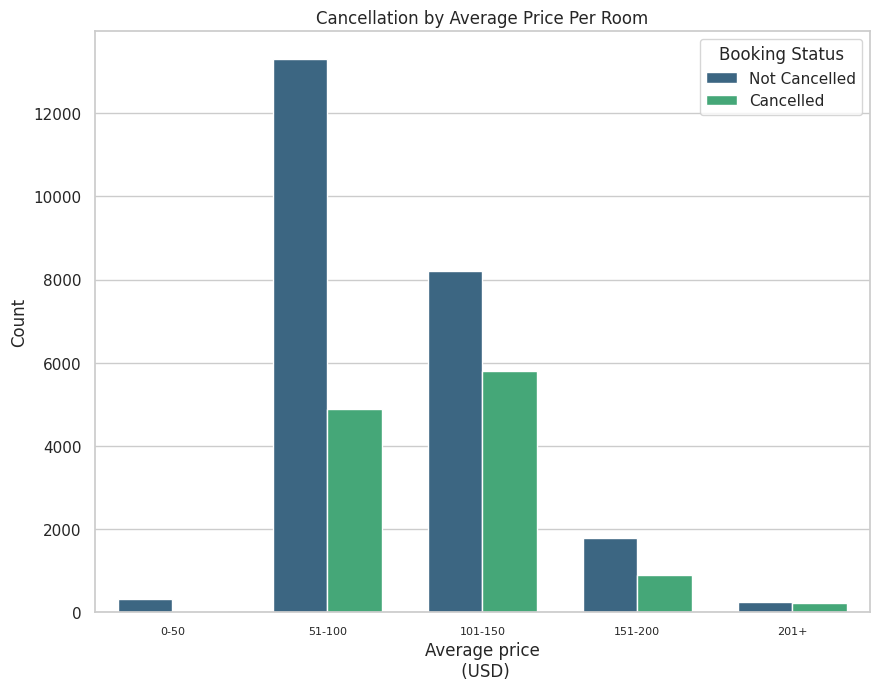

In [33]:
plt.figure(figsize=(10, 7))

labels = ['0-50', '51-100', '101-150', '151-200', '201+']

sns.countplot(x=pd.cut(df["avg_price_per_room"], bins=[0, 50, 100, 150, 200, np.inf], labels=labels ),hue="booking_status", data=df, width=0.7, palette='viridis')

plt.title("Cancellation by Average Price Per Room")
plt.xlabel("Average price\n (USD)")
plt.ylabel("Count")
plt.xticks(fontsize=8)
plt.legend(title="Booking Status", labels=['Not Cancelled', 'Cancelled'])
plt.subplots_adjust(bottom=0.05)
plt.show()

the majority of bookings fall within the price range of 51-150. The highest number of cancellations occurs within the price range of 101-200

Relationship between Avg Price and Arrival Month by Booking cancellation status

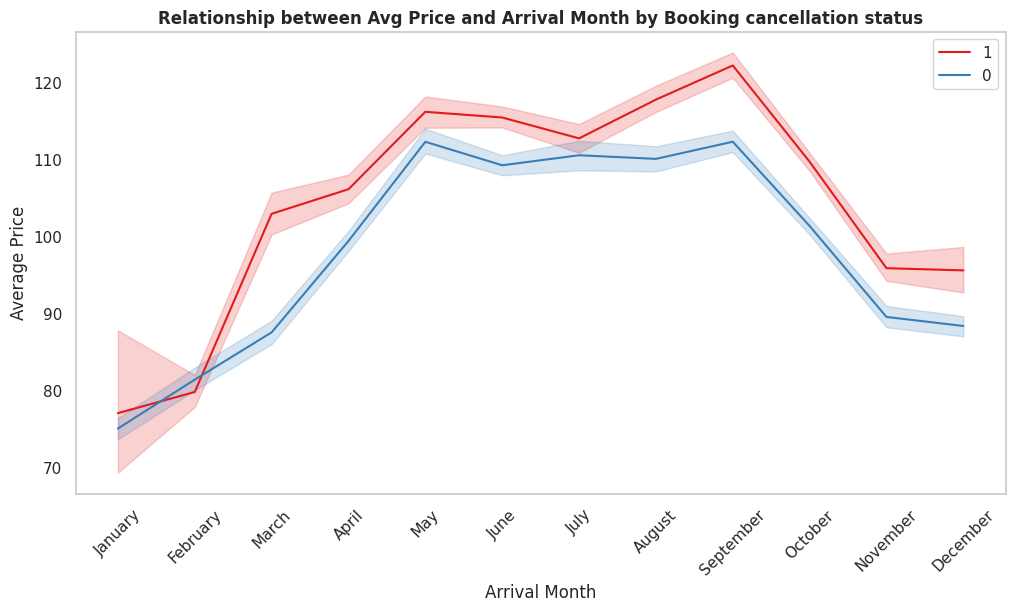

In [34]:
plt.figure(figsize=(12,6))
sns.lineplot(x = "arrival_month", y = "avg_price_per_room", hue="booking_status",hue_order= [1,0],data=df, palette= 'Set1')
plt.title("Relationship between Avg Price and Arrival Month by Booking cancellation status", weight = 'bold')
plt.xlabel("Arrival Month")
plt.xticks(rotation=45)
plt.ylabel("Average Price")
# Manually renaming x-tick labels
plt.xticks(range(1,13), ordered_months, rotation=45)
plt.legend(loc="upper right")
plt.grid(False)
plt.show()


Total Nights Spent by Guests at the Hotel by Market Segment

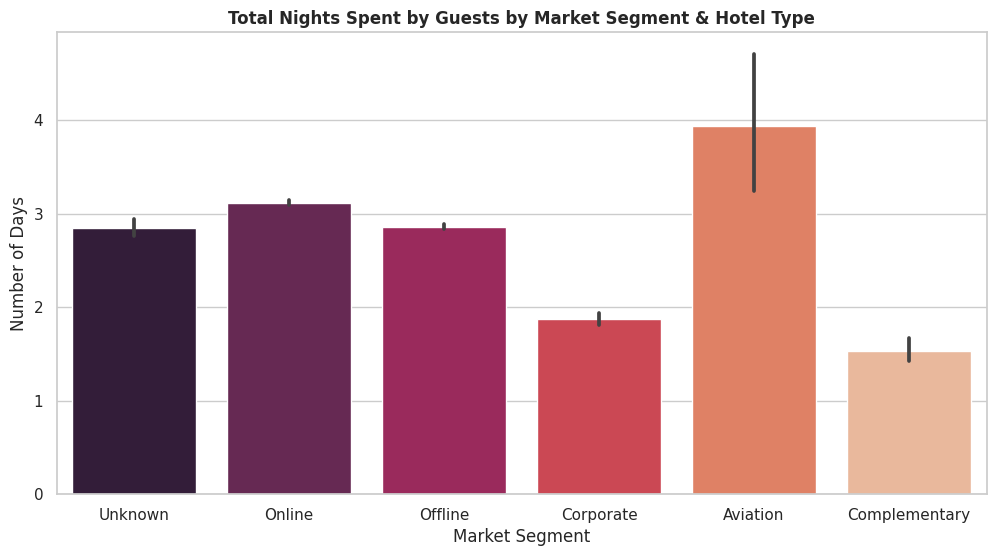

In [35]:
df['total_stay'] = df['no_of_weekend_nights'] + df['no_of_week_nights']
plt.figure(figsize=(12,6))
sns.barplot(x = "market_segment_type", y = "total_stay", data = df, palette = 'rocket')
plt.title('Total Nights Spent by Guests by Market Segment & Hotel Type', weight='bold')
plt.xlabel('Market Segment')
plt.ylabel('Number of Days');


Arrival Date Year vs Lead Time By Booking Cancellation Status

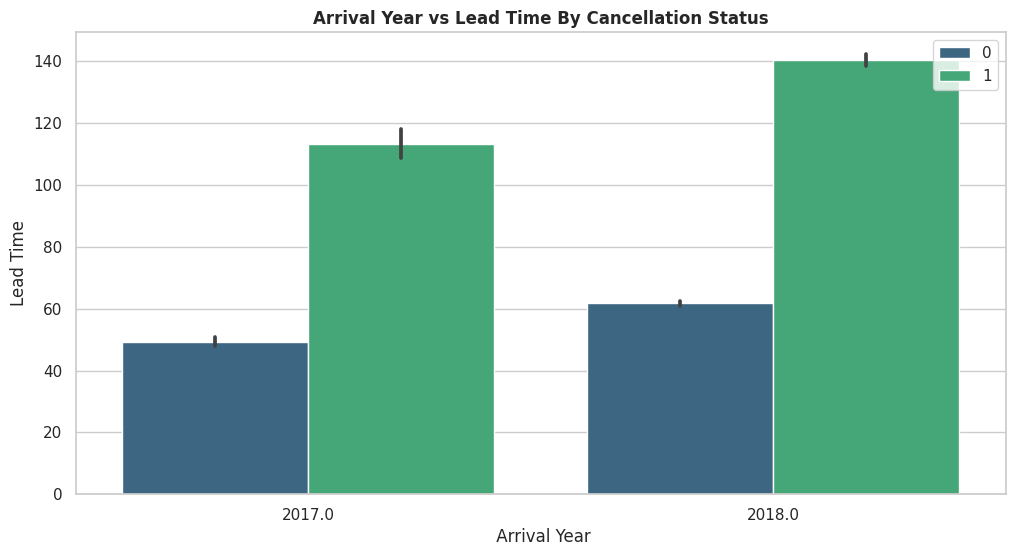

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(x='arrival_year', y ='lead_time', hue="booking_status", data=df, palette="viridis")
plt.title('Arrival Year vs Lead Time By Cancellation Status', weight='bold')
plt.xlabel(' Arrival Year')
plt.ylabel('Lead Time')
plt.legend(loc = "upper right")

In conclusion, the analysis of hotel cancellation data has revealed several significant factors that influence guest cancellations. These factors include lead time, average daily rate (ADR), and arrival day of the month. Understanding these factors is essential for hoteliers to develop effective strategies to mitigate cancellations and improve overall customer satisfaction.

To counter high cancellations, hotels should consider implementing measures such as setting non-refundable rates, collecting deposits, and enforcing stricter cancellation policies. Additionally, offering advanced purchase rates with varying lead time windows can incentivize guests to book early and maintain their reservations. Encouraging direct bookings by providing special discounts is another effective strategy to reduce cancellations, as it fosters stronger relationships between the hotel and its guests.

Furthermore, hotels should pay close attention to the total number of special requests made by guests. By addressing these requests and improving customer service, hotels can enhance guest satisfaction and reduce the likelihood of cancellations. Monitoring the sources of cancellations, such as market segments and distribution channels, can also help hoteliers identify potential problem areas and develop targeted interventions.

Overall, by utilizing data-driven insights and implementing strategic measures, hotels can effectively reduce cancellations, improve customer satisfaction, and ultimately increase their profitability.

